In [1]:
#Install packages:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.patches as mpatches

import requests
import math
import csv

In [2]:
#read characteristics and metadata from csv to dfs:
datasets_char = pd.read_csv('../thesis/Datasets_combined_characteristics.csv')
datasets_meta = pd.read_csv('../thesis/Datasets_combined_Metadata.csv')

In [164]:
datasets_char

,Unnamed: 0,Data set name,Access type,Link to dataset,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Comment
0,0,Belarus,Not availble anymore,https://tbportals.niaid.nih.gov,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BIMCV-COVID19+,Public*,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020.0,3,2023.0,Padchest,Y,Y,Y,Y,* requires filling in formular
2,2,BRAX,By request,https://physionet.org/content/brax/1.1.0/,Brazil,2022.0,1.1.0,2022.0,N,N,Y,Y,Y,NaN
3,3,CANDID-PTX,By request,https://figshare.com/articles/dataset/CANDID-P...,New Zealand,2021.0,NaN,2021.0,N,Y,Y,Y,Y,NaN
4,4,Chest x-ray disease images,Public,https://www.kaggle.com/datasets/parsagouran/ch...,NaN,2023.0,NaN,2023.0,NaN,N,N,N,N,NaN
5,5,Chest X-Rays - Covid19 Pakistan,Public,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020.0,1,2020.0,NaN,Y,N,N,N,NaN
6,6,Chest X-Rays Dataset,Public,https://datasetsearch.research.google.com/sear...,NaN,2018.0,NaN,2018.0,NaN,Y,N,N,N,NaN
7,7,CHEST-XRAY-PNEUMONIA,Restricted,https://ieee-dataport.org/documents/chest-xray...,NaN,2021.0,NaN,2021.0,NaN,N,N,N,N,Requires log in to IEEE port (payment)
8,8,ChestX-ray14,Public,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020.0,NaN,2020.0,ChestX-ray8,Y,N,N,N,NaN
9,9,ChestX-ray8,Public,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017.0,NaN,2017.0,NaN,Y,N,N,N,NaN


In [3]:
#drop unnamed:0 column:
datasets_char = datasets_char.drop(columns='Unnamed: 0')

In [4]:
datasets_char

,Data set name,Access type,Access details,Link to dataset,Citatation,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,...,Number of citations,Source for identification of number of citations,Image format,View position,Labels (Image feature labels),Diseases included,Patient age,Patient gender,Comments,Also cite:
0,Belarus,No access,Link not available anymore,https://tbportals.niaid.nih.gov,NaN,Belarus,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Clark K, Vendt B, Smith K, Freymann J, Kirby J..."
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,Padchest,...,142,Google Scholar,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",44824,44824,NaN,NaN
2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,"Reis, E. P., Paiva, J., Bueno da Silva, M. C.,...",Brazil,2022,1.1.0,2022,NR,...,5,Google Scholar,DICOM,"Frontal,lateral",14,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",40967,40967,Age is reported in 5-year groups,"Goldberger, A., Amaral, L., Glass, L., Hausdor..."
3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,"Feng, Sijing; Azzollini, Damian; Kim, Ji Soo; ...",New Zealand,2021,NR,2021,NR,...,0,Google Scholar,DICOM,Frontal,4,"Pneumothorax, no pneumothorax, unsure positive...",19237,192030,NaN,NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,NR,...,0,NaN,"jpg, jpeg",NR,NR,NR,NR,NR,NaN,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,NR,...,0,Google Scholar,JPEG,Frontal,2,"Covid-19, non-covid-19",NR,NR,NaN,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,NR,...,0,NaN,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",NR,NR,NaN,NaN
7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,"Anubhav Saha, Yateendra Mishra, May 7, 2021, ""...",NR,2021,NR,2021,NR,...,2,Google Scholar,NR,NR,NR,Pneumonia,NR,NR,NaN,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,ChestX-ray8,...,3214,Google Scholar,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...",112120,112120,NaN,NaN
9,ChestX-ray8,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2017,NR,...,3214,Google Scholar,png,"AP, PA",8,"Atelectasis, Infiltration, Pneumothorax, Effus...",NR,NR,NaN,NaN


In [5]:
datasets_meta

,Unnamed: 0,Data set name,Number of images,Number of unique patients,Number of studies included,Image format,View position,Labels (Image feature labels),Diseases included,Patient age,Patient gender,Comments
0,0,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BIMCV-COVID19+,5530.0,1311.0,2429.0,PNG,"frontal,lateral",NaN,"Covid-19, increased density, pneumonia, unchan...",63.11 (± 16.75),602 (45.92%) female,"*Diseases identified in 50 or more cases,This ..."
2,2,BRAX,40967.0,19351.0,24959.0,DICOM,"Frontal,lateral",14.0,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",NaN,NaN,Age/Gender is not stated can be accessed by fu...
3,3,CANDID-PTX,19237.0,NaN,NaN,DICOM,Frontal (incl. bedside),4.0,"Pneumothorax, no pneumothorax, unsure positive...","60.1 (± 20.1), over 16 years","10278 male, 8929 female, 30 NA",NaN
4,4,Chest x-ray disease images,572.0,NaN,NaN,"jpg, jpeg",NaN,NaN,NaN,NaN,NaN,NaN
5,5,Chest X-Rays - Covid19 Pakistan,527.0,75.0,NaN,JPEG,Frontal,2.0,"Covid-19, non-covid-19",NaN,NaN,NaN
6,6,Chest X-Rays Dataset,910.0,NaN,NaN,"jpg, jpeg, png, gif",NaN,5.0,"Atelectasis, Infiltration, Effusion, Cardiomeg...",NaN,NaN,NaN
7,7,CHEST-XRAY-PNEUMONIA,NaN,NaN,NaN,NaN,NaN,NaN,Pneumonia,NaN,NaN,NaN
8,8,ChestX-ray14,112120.0,30805.0,NaN,png,Frontal,14.0,"Atelectasis, Infiltration, Pneumothorax, Effus...",NaN,NaN,NaN
9,9,ChestX-ray8,108948.0,32717.0,NaN,png,Frontal,8.0,"Atelectasis, Infiltration, Pneumothorax, Effus...",NaN,NaN,NaN


In [6]:
#drop unnamed:0 column:
datasets_meta = datasets_meta.drop(columns='Unnamed: 0')

In [7]:
datasets_char.groupby('Access type').nunique()

,Data set name,Access details,Link to dataset,Citatation,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),...,Number of citations,Source for identification of number of citations,Image format,View position,Labels (Image feature labels),Diseases included,Patient age,Patient gender,Comments,Also cite:
Access type,,,,,,,,,,,,,,,,,,,,,
No access,5,1,3,0,3,2,1,2,1,1,...,1,0,2,1,2,2,1,1,0,1
Open access,32,10,30,20,11,9,6,10,7,2,...,17,1,17,12,8,22,10,11,4,2
Regulated access,8,6,8,8,6,7,3,7,1,2,...,8,1,3,6,4,8,5,5,3,1


In [8]:
#clean text for access type:
datasets_char['Access type'] = datasets_char['Access type'].replace({'Pubic':'Public', 'Publc':'Public', 'Not availble anymore':'Not available anymore'})

In [9]:
#re-view the different access types:
datasets_char.groupby('Access type').nunique()

,Data set name,Access details,Link to dataset,Citatation,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),...,Number of citations,Source for identification of number of citations,Image format,View position,Labels (Image feature labels),Diseases included,Patient age,Patient gender,Comments,Also cite:
Access type,,,,,,,,,,,,,,,,,,,,,
No access,5,1,3,0,3,2,1,2,1,1,...,1,0,2,1,2,2,1,1,0,1
Open access,32,10,30,20,11,9,6,10,7,2,...,17,1,17,12,8,22,10,11,4,2
Regulated access,8,6,8,8,6,7,3,7,1,2,...,8,1,3,6,4,8,5,5,3,1


In [10]:
#remove the datasets that are not available anymore or regulated:
datasets_char= datasets_char[datasets_char['Access type'].str.contains('No access')==False]
datasets_char= datasets_char[datasets_char['Access type'].str.contains('Regulated access')==False]

In [11]:
#reset index to add the index to a seperate column:
datasets_char=datasets_char.reset_index()

In [12]:
#There are 36 datasets left:
datasets_char['index'].count()

32

In [13]:
datasets_char

,index,Data set name,Access type,Access details,Link to dataset,Citatation,Country of origin,Year of dataset publication,Version,"Last updated, year",...,Number of citations,Source for identification of number of citations,Image format,View position,Labels (Image feature labels),Diseases included,Patient age,Patient gender,Comments,Also cite:
0,1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,...,142,Google Scholar,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",44824,44824,NaN,NaN
1,4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,...,0,NaN,"jpg, jpeg",NR,NR,NR,NR,NR,NaN,NaN
2,5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,...,0,Google Scholar,JPEG,Frontal,2,"Covid-19, non-covid-19",NR,NR,NaN,NaN
3,6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,...,0,NaN,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",NR,NR,NaN,NaN
4,8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,...,3214,Google Scholar,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...",112120,112120,NaN,NaN
5,9,ChestX-ray8,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2017,...,3214,Google Scholar,png,"AP, PA",8,"Atelectasis, Infiltration, Pneumothorax, Effus...",NR,NR,NaN,NaN
6,10,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,"Irvin, Jeremy, et al. ""Chexpert: A large chest...",USA,2019,1.0,2019,...,1562,Google Scholar,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,NR,NR,NaN,NaN
7,11,COVID 19 Xray Image Dataset with Huge Samples,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mr3suvhro/covi...,NR,NR,2020,NR,2020,...,0,NaN,"png, jpeg, jpg",NR,NR,"Covid-19, non-covid-19",NR,NR,NaN,NaN
8,12,COVID-19 AND NORMAL CHEST X-RAY,Open access,Create IEEE port account and download zip-file,https://ieee-dataport.org/open-access/covid-19...,"Happy Monday, May 23, 2021, ""COVID-19 AND Norm...",China,2021,NR,2021,...,1,Google Scholar,jpg,NR,NR,Covid-19,NR,NR,NaN,NaN
9,13,Covid-19 chest x-ray detection dataset,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/rahulmakwana/c...,NR,NR,2020,1,2020,...,0,NaN,"png, jpeg, jpg",NR,NR,Covid-19,NR,NR,NaN,NaN


In [14]:
#distribution of geographical spread:
geo = datasets_char.groupby('Country of origin')['index'].nunique()

In [15]:
#reset index:
geo = geo.reset_index()

In [16]:
#sort values: descending order:
geo = geo.sort_values(by=['index'], ascending=True)

Text(0, 0.5, ' ')

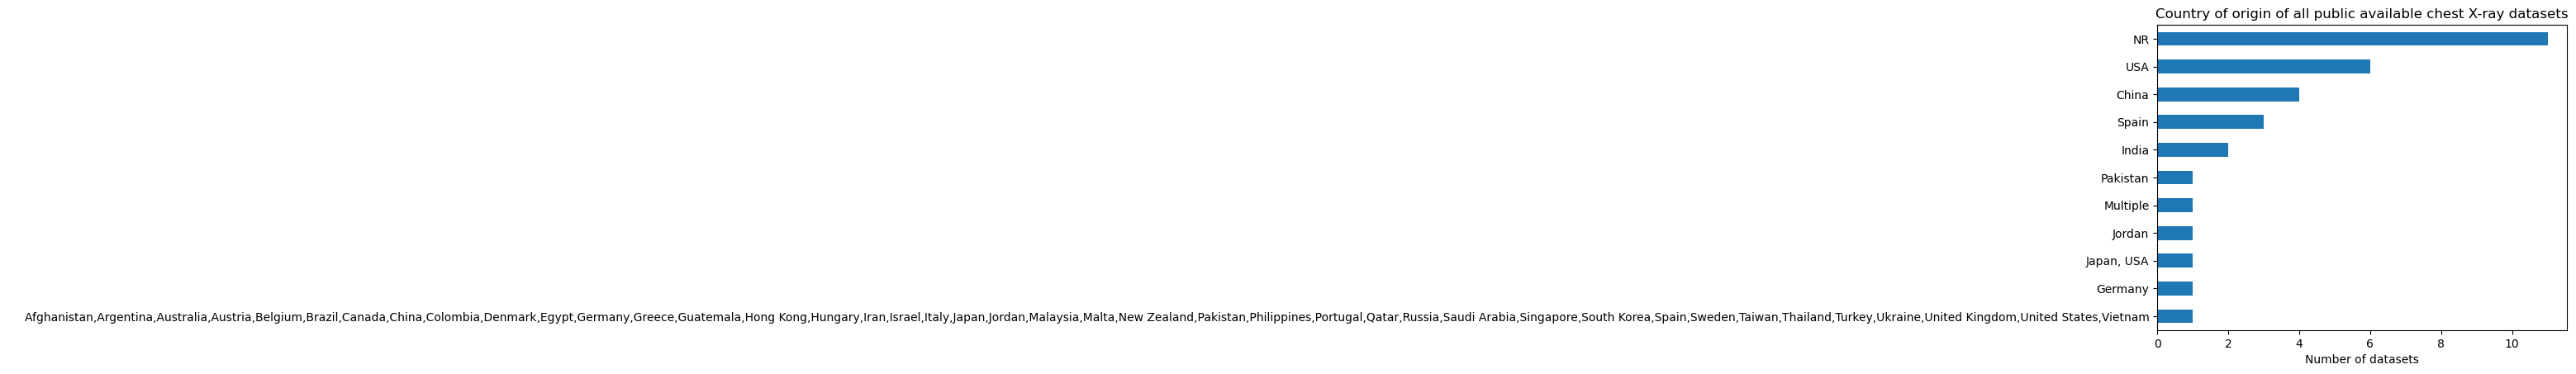

In [17]:
#barplot of geographical origins of datasets:
ax = geo.plot.barh(x='Country of origin', y='index', legend=False, title='Country of origin of all public available chest X-ray datasets')
ax.set_xlabel('Number of datasets')
ax.set_ylabel(' ')

In [18]:
#group by publication year and reset index:
publication_year = datasets_char.groupby('Year of dataset publication')['index'].nunique().reset_index()

In [19]:
publication_year

,Year of dataset publication,index
0,2000,1
1,2014,4
2,2015,1
3,2017,3
4,2018,1
5,2019,2
6,2020,14
7,2021,3
8,2023,3


In [20]:
publication_year['Year of dataset publication'] = publication_year['Year of dataset publication'].astype(int)

In [21]:
publication_year

,Year of dataset publication,index
0,2000,1
1,2014,4
2,2015,1
3,2017,3
4,2018,1
5,2019,2
6,2020,14
7,2021,3
8,2023,3


Text(0, 0.5, 'Number of datasets')

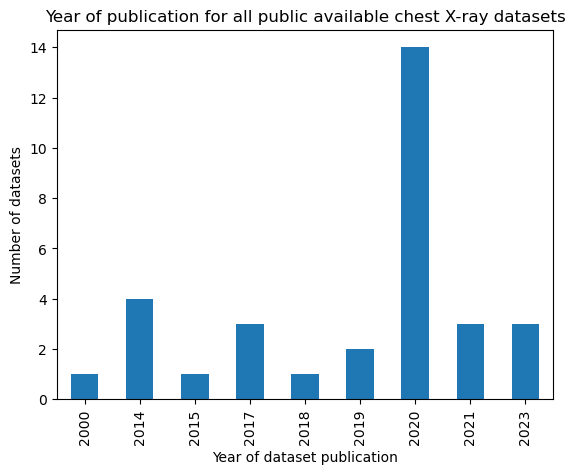

In [22]:
#barplot of year of publication of datasets:
ax = publication_year.plot.bar(x='Year of dataset publication', y='index', legend=False, title='Year of publication for all public available chest X-ray datasets')
ax.set_ylabel('Number of datasets')

In [23]:
#group by Collection period stated and reset index:
collec_period = datasets_char.groupby('Data collection period (Y/N)')['index'].nunique().reset_index()

In [24]:
collec_period

,Data collection period (Y/N),index
0,N,20
1,Y,12


In [25]:
#group by participant consent stated and reset index:
paticipant_consent = datasets_char.groupby('Statement on participant consent (Y/N)')['index'].nunique().reset_index()

In [26]:
paticipant_consent

,Statement on participant consent (Y/N),index
0,N,24
1,N*,6
2,Y,2


Text(0, 0.5, ' ')

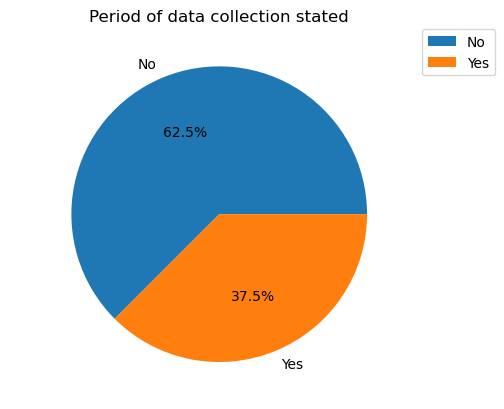

In [27]:
labels = ['No', 'Yes']

ax = collec_period.plot.pie(y='index', title="Period of data collection stated", labels=labels,
                   autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_ylabel(' ')